# Análise de Dados e Inferência Estatística com Python

### Trabalho I - Tratamento de dados com Estatística

**Professor:** Paulo Cotta

**Entrega:** 29/10/2019

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston.

Neste projeto, você irá avaliar um conjunto de dados coletado dos imóveis dos subúrbios de Boston, Massachusetts. O principal objetivo deste trabalho é realizar a análise e começar a trabalhar com funções e métodos que serão utilizados no dia a dia de vocês como Engenheiros de Dados e/ou Engenheiros de Machine Learning.


**Vale lembrar que o trabalho terá situações que serão feitas em sala de aula (então nem todo o conteúdo foi abordado ainda), para qualquer dúvida pode procurar o professor.**

In [1]:
# Verificação se o sklearn está instalado na sua máquina
import sklearn
print("A versão do scikit-learn é ", sklearn.__version__)

A versão do scikit-learn é  0.21.2


O sklearn é um framework que já possui alguns algoritmos de Machine Learning (ML) prontos. Eu recomento que utilizem sempre a ultima versão do framework.

Documentação: [link](https://scikit-learn.org/stable/)

Mediante ao cenário seguinte:

Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

Fica mais tranquilo efetuar o trabalho conhecendo um pouco sobre o conjunto de dados (dataset).

In [2]:
# Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
# Dropando a coluna com maior indice de valores ausentes
features = data.drop('MEDV', axis = 1)

data.info()

# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB
O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### Explorando os dados

Você aluno deve efetuar uma investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

In [4]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


In [5]:
# Trouxe os mesmo resultados apresentados e inclusive os Quartis
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### Questão 1

Estamos utilizando apenas as seguintes variáveis para analisar:
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.


**A) Qual das variáveis pode interferir com o valor da variável `'MEDV'` e elevar o seu aumento?**


**B) A mesma variável da questão A `'MEDV'`, qual variável pode diminuir o seu valor?**

**OBS:** Lembra-se que podem utilizar as variáveis que ditam a MODA em formato estatítisco.

In [6]:
from pandas.plotting import scatter_matrix

In [7]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


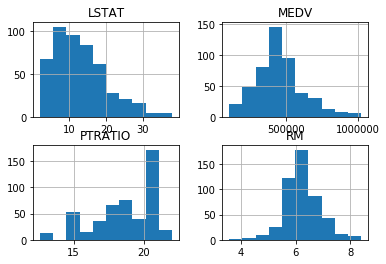

In [8]:
_ = data.hist()

<div style="color: cadetblue;">
    <h1>
        Resposta Questão 1
    </h1>
    <p>
        Percebemos pelas visualizações 
        seguintes que a variável RM possui uma correlação 
        de 0.69, colaborando bastante para o aumento da variável MEDV.
    </p>
    <p>
        A variável LSTAT possui uma correlação negativa, -0.76, o que 
        indica que seu aumento causa uma diminuição em MEDV.
    </p>
    <p>
        A variável PTRATIO tem correlação negativa, -0.51, contribuindo, 
        também, para a diminuição de MEDV, mas não com tanta relevância.
    </p>
</div>

In [9]:
data.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


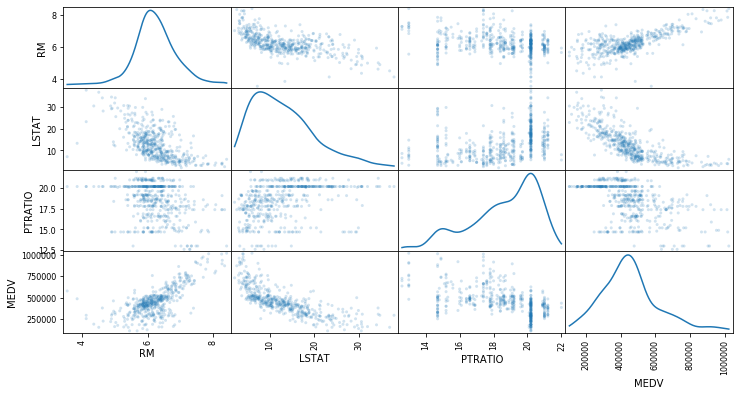

In [10]:
_ = scatter_matrix(data, alpha=0.2, figsize=(12,6), diagonal='kde')

In [28]:
import matplotlib.pyplot as plt
from sklearn import linear_model

-40647.21475513662 1206989.7151776277


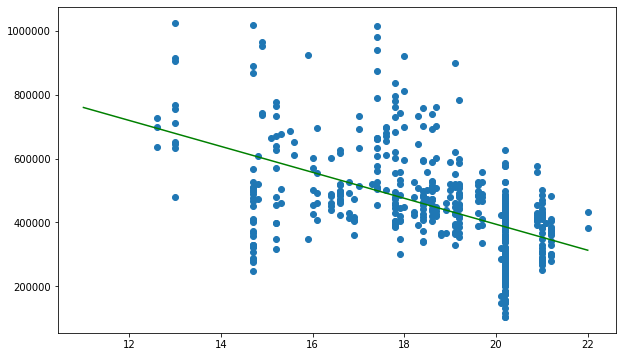

In [34]:
reg = linear_model.LinearRegression()
reg.fit(np.array(data.PTRATIO.values).reshape(-1, 1), np.array(data.MEDV.values).reshape(-1, 1))
c = reg.coef_[0][0]
inter = reg.intercept_[0]
print(c, inter)
x = range(int(data.PTRATIO.min()) - 1,int(data.PTRATIO.max() + 1))
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.plot(x , (x*c + inter), c='g')
plt.scatter(data.PTRATIO, data.MEDV)

### Modelo Métrica de Desempenho

Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas.

In [13]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2

Dado a função acima do modelo de performance por desempenho, usando o coeficiente R<sup>2</sup> devemos utilizar algumas métricas.

Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [14]:
# Insira o código usando a função performance_metric para calcular
reais = [3., -.5, 2., 7., 4.2]
estimados = [2.5, 0.0, 2.1, 7.8, 5.3]

resultado = performance_metric(reais, estimados)
resultado

0.9228556485355649

**Justifique o valor de saída da função R<sup>2</sup>:**

<div style="color: cadetblue;">
    <h1>
        Resposta Questão 2
    </h1>
    <p>
        Em
        <a target="_blank">
            https://en.wikipedia.org/wiki/Coefficient_of_determination
        </a> podemos ver que 
        $
            R^{2} = 1 - \frac{SS_{res}}{SS_{tot}}
        $
        </p>
        <p>
        Onde:<br>
        $
        SS_{res} = \sum(y_i - f_i)^2
        $, em que f é a função da regressão linear, ou seja, trata-se da soma dos
        quadrados das diferenças entre o resultado real e o previsto pela regressão; e
    </p>
    <p>
        $
        SS_{tot} = \sum(y_i - \overline{y})^2
        $, ou seja, a soma dos quadrados da distância do resultado real para a média dos resultados.
    </p>
    <p>
        Esse valor será 1 quando $SS_{res}$ for 0, ou seja, 
        a reta de regressão linear coincidiu sempre com os valores
        reais.
    </p>
</div>

<div style="color: cadetblue;">
    <h2>
        Vamos olhar os valores para $SS_{tot}$
    </h2>
</div>

In [15]:
reais_s= pd.Series(reais)
reais_mean = reais_s.mean()
ss_tot_par = (reais_s - reais_mean)**2
ss_tot_par

0     0.0196
1    13.2496
2     1.2996
3    14.8996
4     1.1236
dtype: float64

In [16]:
ss_tot = sum(ss_tot_par)

<div style="color: cadetblue;">
    <h2>
        Agora para $SS_{res}$
    </h2>
</div>

In [17]:
from sklearn import linear_model

<div style="color: cadetblue;">
    <h2>
        A equação da regressão tem o seguinte coeficiênte e intercepto:
    </h2>
</div>

1.0781250000000002 0.15468749999999964


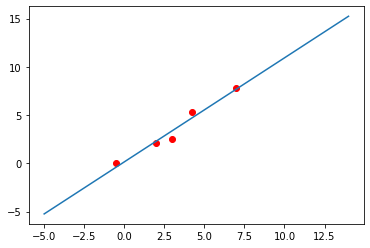

In [18]:
reg = linear_model.LinearRegression()
reg.fit(np.array(reais).reshape(-1, 1), np.array(estimados).reshape(-1, 1))
c = reg.coef_[0][0]
inter = reg.intercept_[0]
print(c, inter)
x = range(-5,15)
plt.scatter(reais, estimados, c='r')
plt.plot(x , (x*c + inter))

<div style="color: cadetblue;">
    <h2>
        Nossa equação é mais ou menos: $1.078x + 0.154$
    </h2>
</div>

<div style="color: cadetblue;">
    <h2>
        Vamos às diferenças:
    </h2>
</div>

In [19]:
reais

[3.0, -0.5, 2.0, 7.0, 4.2]

In [20]:
estimados

[2.5, 0.0, 2.1, 7.8, 5.3]

In [21]:
verdadeiro = pd.Series(reais)
est = (1.078125 * verdadeiro) + 0.15468
est

0    3.389055
1   -0.384382
2    2.310930
3    7.701555
4    4.682805
dtype: float64

In [22]:
dif = (verdadeiro - est)**2
dif

0    0.151364
1    0.013367
2    0.096677
3    0.492179
4    0.233101
dtype: float64

In [23]:
ss_res = dif.sum()

In [24]:
meu_r2 = 1- (ss_res/ss_tot)
meu_r2

0.9677468373992792

<div style="color: cadetblue;">
    <h2>
        Como podemos ver, o último indicador calculado foi ainda melhor, atingindo 0.96
    </h2>
</div>

<div style="color: cadetblue;">
    <h2>
        Temos que $R²=1 - \frac{SS_{res}}{SS_{tot}}$
    </h2>
</div>

<div style="color: cadetblue;">
    <h2>
        Com $SS_{tot}$ constante igual a 1, temos:
    </h2>
</div>

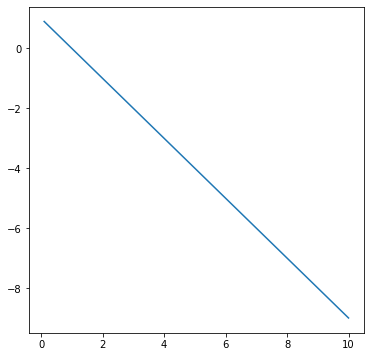

In [25]:
fig = plt.figure(figsize=(6,6))
x = np.linspace(0.1,10,100)
y = 1 - x
plt.plot(x,y)

<div style="color: cadetblue;">
    <h2>
        Com $SS_{res}$ constante igual a 1, temos:
    </h2>
</div>

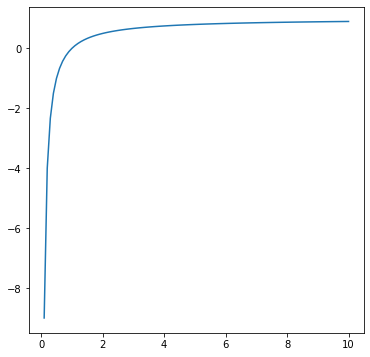

In [26]:
fig = plt.figure(figsize=(6,6))
x = np.linspace(0.1,10,100)
y = 1 - 1/x
plt.plot(x,y)

<div style="color: cadetblue;">
    <h2>
        Dos gráficos anteriores, concluímos que o valor de $R²$ pode até ser negativo se:
        <ul>
            <li>A soma dos quadrados das diferenças dos resíduos $(SS_{res})$ for maior que a soma dos quadrados das diferenças da média do conjunto $(SS_{tot})$; ou</li>
            <li>Quando a soma dos quadrados das diferenças da média $(SS_{tot})$ do conjunto tender a zero.</li>
        </ul>
    </h2>
</div>

### Em formato de conhecimento - Misturar e Separar os Dados

Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Neste caso será mostrado a separação do dataset em 80% treinamento e 20% em teste, o que geralmente fazemos em um modelo de Machine Learning e ou Deep Learning. 


Para título de curiosidade [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html).

In [27]:
# TODO: Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X = np.array(data[['RM', 'LSTAT', 'PTRATIO']])
y = np.array(data['MEDV'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3

Após executar todo o trabalho, apresente uma revisão sistemática do uso de média, mediana e R<sup>2</sup>. Cada item deve conter, no mínimo, 2 (dois) parágrafos de explicação.
Importante: Lembre-se de adicionar as referências bibliográficas utilizadas.